# Convincing the Older Generation to Share Bikes: 
## A Reason to Love Bikes Via Statistical Analysis

### Overview


### Introduction
In 2013, Citibike opened to the public at New York City.  Year after year, the bike sharing system has provided subscribers and customers a 'last-mile' solution to transporting around the city.  The bike sharing service allows users to travel to work, sightsee across the streets, commute to work, and allow them to take care of their errands.  However, a setting that CitiBike seems to concern itself is the summer.  

The summer provides a chance to see CitiBike in action.  More tourists come to the city, people are still working, and the slowness or the fun of the city comes alive around this time, with festivals and welcoming weather.  However, with CitiBike operating for over 5 years, many in the team would like to know what the next five years would bring and how opportune is the summer to encourage more cycling among older members.  

The aim with the Citibike data is to explore human dynamics associated with trips.  In this case, it focuses more on the age category.  Generation dynamics is important for something substantial as bike sharing.  Bikes have been prominent for a long time; however, bike sharing became widespread at the start of the 2010s to reduce greenhouse gases and carbon emissions.  

The group of interest are older adults (i.e. Baby Boomers).  With their work lives dwindling and having fixated minds, many would wonder of a way to get fit.  And CitiBike with its cost and benefits would be an appealing option over gym memberships and other forms of activity.  This combines travel, exercise, relaxation, and accessibility as some of the reasons to encourage older users to change to subscribers or to attract.  But how do we know whether older members would get the benefits.

One area would be as to how long their trips take.  Subscribers are allowed up to 45 minutes to travel from station to another without a single charge.  This is one of the benefits of being a CitiBike subscriber.  But some of the skepticism from older potential users would be whether this would be more for younger and more active audiences.  Below is a first run statistical analysis to show that older users do have the same trip time as those of different generations and they can fit into the CitiBike culture.

The **client** is towards two teams:

* Strategy & Business Development
* Marketing

These analyses would foster a connection between the need to vouch towards older audience members.  Using this simple statistics analysis, this would confirm their need.  The attractive audience is older audience and baby boomers to join in the debate.  

### Setup 

The data comes from the Citibike System Data page.  One may access it at https://s3.amazonaws.com/tripdata/index.html.  The data consists of millions of trips as observations and several tiers of attributes:

* Trip details (i.e. tripduration, starttime, stoptime)
* Start station details (i.e. id, name, latitude, longitude)
* End station details
* Bike ID
* Customer details (i.e. usertype, birth year)

If separating variables, the significant ones include:

* Trip duration (numerical)
* Birth year (categorical)
* User type (categorical, customer or subscriber)
* Gender (categorical, male female or other)
* Start time
* Stop time

Cleansing the data was needed in several areas:

* To format the year attribute to reflect an integer
* To wrangle the start and stop dates so as to obtain weekdays or date-specific information
* To identify and fill in any missing data (i.e. associated with usertype, proper categories)
* To create a new grouping attribute, called age group, that defines a generation based on year range

Besides these, no further actions were required on the dataset.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sample = pd.read_csv('story_data.csv')

In [3]:
sample.shape

(1557663, 15)

In [5]:
pd.options.display.float_format = '{:.0f}'.format

In [6]:
sample['starttime'] = pd.to_datetime(sample['starttime'])
sample['stoptime'] = pd.to_datetime(sample['stoptime'])

#### Summary
The variables 'starttime' and 'stoptime' now have the datetime64 data type, making it easier to use the build-in functions to explore the date and time in numerous ways.  Also, with one month, there are 214,624 trips without a birth year.  It is possible that they could all be customers, since they don't require a birth year to purchase a day pass.

The data itself has more categorical information than non-categorical.  Only trip duration, the time the bike was used between checking out the bike and return it back to another hub, is numerical to explore further.  Everything else must rely on its counts and calculations.  The significant attributes for this set are:

* Trip duration
* Start time
* Stop time
* User type
* Birth year
* Gender

Others, especially the station details, may come in handy in the visualization, but not right now. 

#### group Attribute
This group will make it easier to work with birth year moving forward.  Rather than worry about 100 groups, this will focus on five.  

* **ELDER**: Those born between 1935 and 1945
* **OLD ADULT**: Those who are elderly, born between 1945 - 1960
* **ADULT**: Those born between 1960 - 1985
* **NEW ADULT**: Those born between 1985 - 2000
* **YOUNG**: Those born 2000 after
* **UNKNOWN**: Those born before 1935, maybe mismatched

In [10]:
def get_group(row):
    if (row['birth year'] >= 2000):
        return 'YOUNG'
    elif (row['birth year'] >= 1985) & (row['birth year'] < 2000):
        return 'NEW ADULT'
    elif (row['birth year'] >= 1960) & (row['birth year'] < 1985):
        return 'ADULT'
    elif (row['birth year'] >= 1945) & (row['birth year'] < 1960):
        return 'OLD ADULT'
    elif (row['birth year'] >= 1935) & (row['birth year'] < 1945):
        return 'ELDER'
    else :
        return 'UNKNOWN'

## Descriptive Statistics

#### Overview

After performing and cleansing the data, it's time to explore the data further.  Here will dedicate time to the 'agegroup' attribute and obtain several statistics and metrics that make show what the data is saying.  

In [11]:
sample['agegroup'] = sample.apply(get_group, axis=1)

In [12]:
sample.groupby('agegroup').size().sort_index()

agegroup
ADULT        732540
ELDER          4512
NEW ADULT    505780
OLD ADULT     98826
UNKNOWN      215366
YOUNG           639
dtype: int64

In [13]:
np.median(sample[sample['birth year'].notnull()]['birth year']).astype(int)

1981

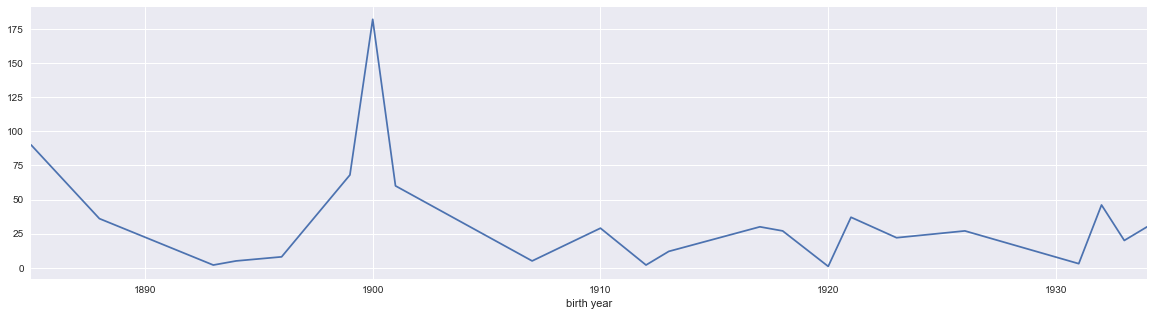

In [15]:
sample[sample['agegroup'] == 'UNKNOWN'].groupby('birth year').size().sort_index().plot(figsize=(20,5))

After creating the separate groups, two groups make up majority of the active users, born from the 1960s to late 1990s.  The median birth year, among those specified, was 1981.  The maximum birth year was 2000.  Preliminary investigation showed all 638 trips operated by users who were born in the year 2000.   

Looking at the unknown group gives a lengthy range.  However, some users in the unknown group include senior    citizens who were born in the late 1930s.  This large spike is rational, versus the mini-spike from 1900.  The mini-spike could be incorrect prompts or defaulted areas.  For example, 1900 may curtail anyone born in the 20th century.  But these are mininscule (with the threshold hovering around 200).

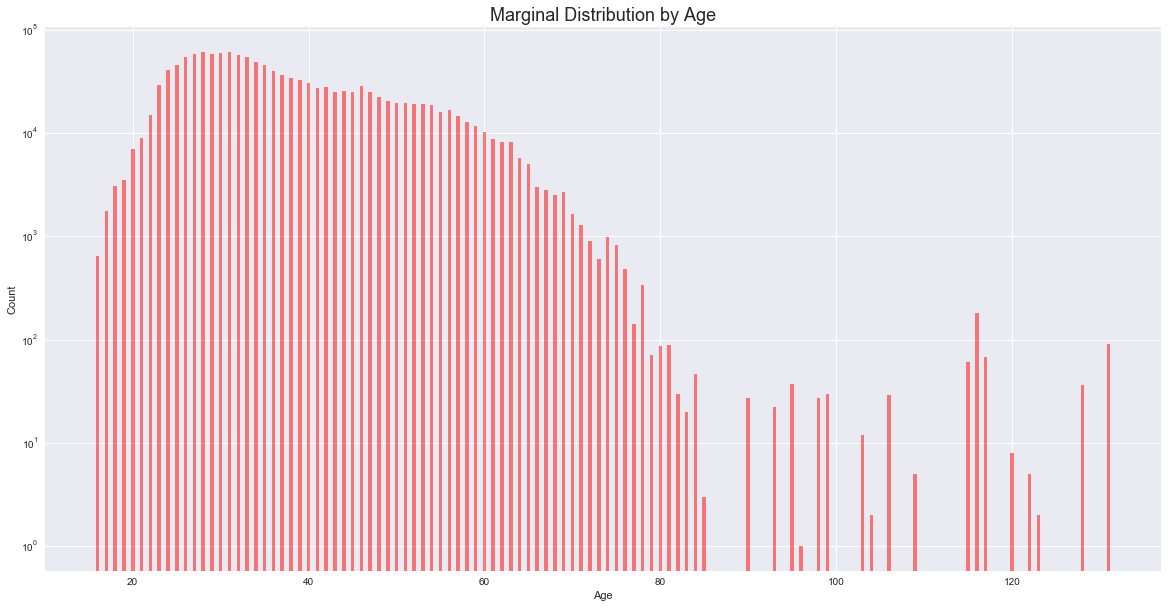

In [18]:
# Marginal distribution by age
age_col = 2016.0 - sample['birth year'].dropna().values
hist_age = np.unique(age_col, return_counts=True)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':14})
plt.bar(hist_age[0], hist_age[1], align='center', color='red', width=0.4, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Marginal Distribution by Age', fontsize=18)
plt.show()

The marginal distribution by age shows a skewed right distribution.  Majority of the subscribers are between 25 and 35, but dwindle down from there.  This causes a need to promote more older adults and make incentives to have them as part of the acquisition strategy.

In [7]:
# WHEN / Count by time: Trip count by trip duration, hourly checkout, daily checkout
# Histogram of Trip Duration, shorter than 1 hour
duration_out = sample.loc[(sample.tripduration / 60 <= (60))][['tripduration']] / 60
duration_mins.hist(bins=100, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', color='orange', figsize=(20,5))

plt.title('Duration Count in an Hour', fontsize=14)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)

NameError: name 'sample' is not defined

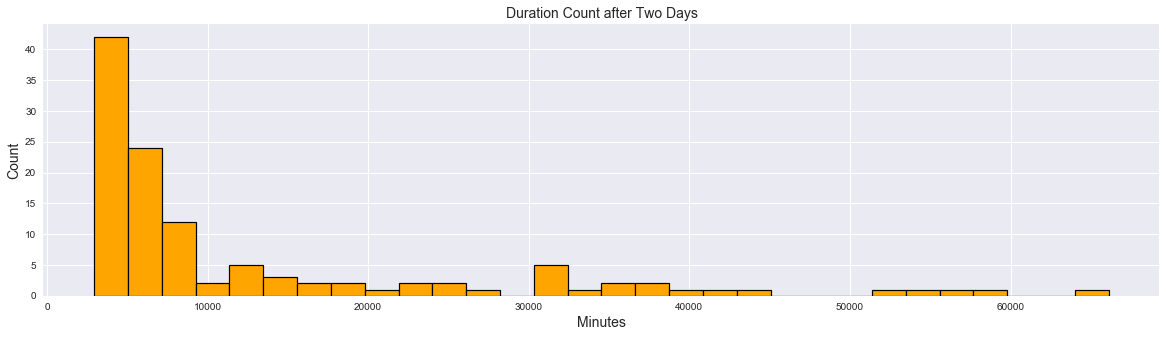

In [20]:
# What about those greater than two days (48 hours)
duration_out = sample.loc[(sample.tripduration / 60 <= (60 * 24))][['tripduration']] / 60
duration_out.hist(bins=30, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', color='orange', figsize=(20,5))

# This was to look at the outliers (anything over a day is unnormal but data has better outliers)
plt.title('Duration Count after Two Days', fontsize=14)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)

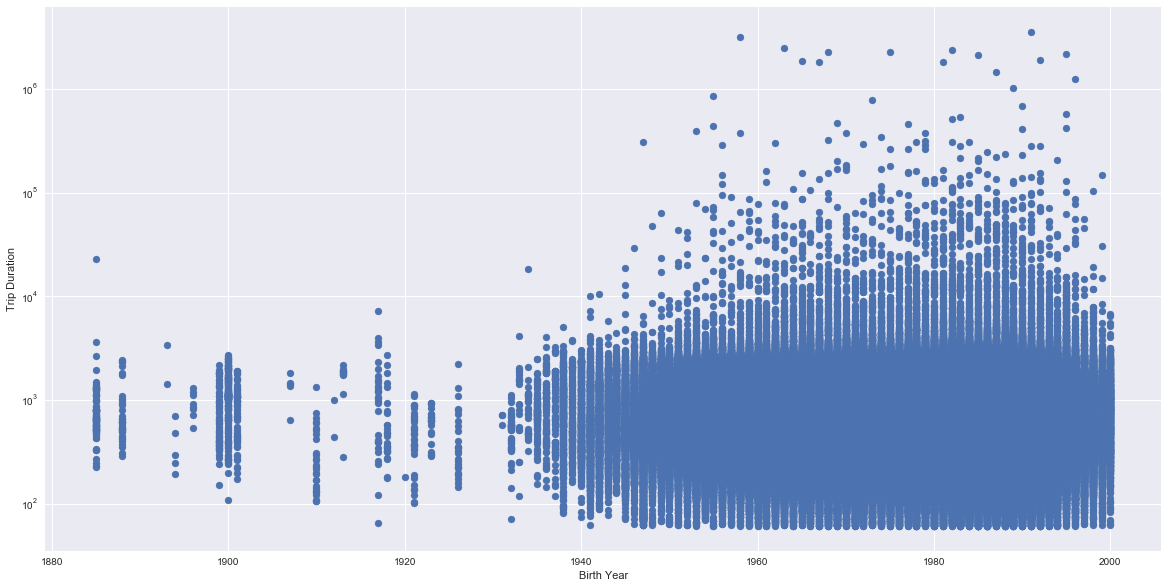

In [26]:
# HOW / Trip Duration by Birth Year: Here a scatterplot is used to compare the trip duration across birth year. 
plt.figure(figsize=[20,10])
plt.scatter(sample['birth year'], sample['tripduration'])
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration')
plt.yscale('log')
plt.show()

The trip duration by birth year supports the marginal distribution of trip counts by age.  

In [31]:
# set up x axis regardless
x_pos=[0,1,2,3,4, 5]
agename=['UNKNOWN', 'ELDER', 'OLD ADULT', 'ADULT', 'NEW ADULT', 'YOUNG']

In [8]:
# Trip Duration Boxplot by Group
duration_by_group = sample.groupby('agegroup')['tripduration']
duration_by_group.describe()

NameError: name 'sample' is not defined

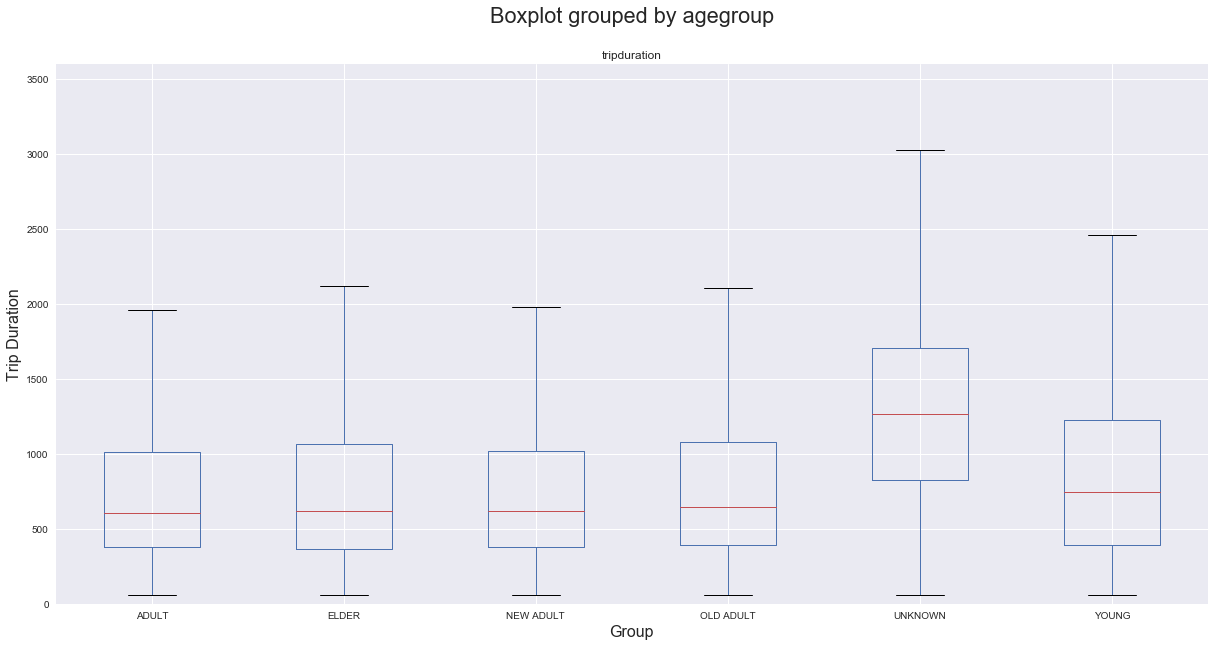

In [36]:
bp = sample.boxplot(column='tripduration', by='agegroup', grid=True, figsize=(20,10))
ax = plt.gca()
ax.set_xlabel('Group', fontsize=16)
ax.set_ylabel('Trip Duration', fontsize=16)
ax.set_ylim([0,3600]) # less than 1 hr
plt.show()

The boxplot shows something unusual.  While the youth (YOUNG) has a self-contained boxplot (meaning that the outliers are clear and there is a beginning or end, due to a small size), only unknown has a large spread.  The others don't differ significantly from each other.  While their outliers may differ (see above), their boxplots look almost similar to each other in spread, median, IQR, and effect.  This is not what to expect and doesn't tell more beyond a typical duration.  One would expect it to increase in trip duration but that is not the case.  It seems that the customers are getting more from their use of Citibike than the subscribers. 

## Inferential Statistics

#### Instructions
At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example:

* are there variables that are particularly significant in terms of explaining the answer to your project question
* are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.


#### Note about Inferential Statistics

Reflection on the data yields several inferential statistics.  The graphs worth keeping include:

* Boxplot grouped by agegroup
* Trip duration by birth year
* Marginal distribution by age

This will be gender-neutral and will focus on the following inferential statistics

The approach will be to focus on August 2016!  Then it will apply to the summer of 2017.

In [62]:
# FUNCTIONS
# define the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Bootstrap replication, one-dimensional
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replication by function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Difference of Means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Permutation replications
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [40]:
samoa = sample[sample.agegroup=='OLD ADULT'].tripduration
x, y = ecdf(sample.tripduration)
x_oa, y_oa = ecdf(samoa)

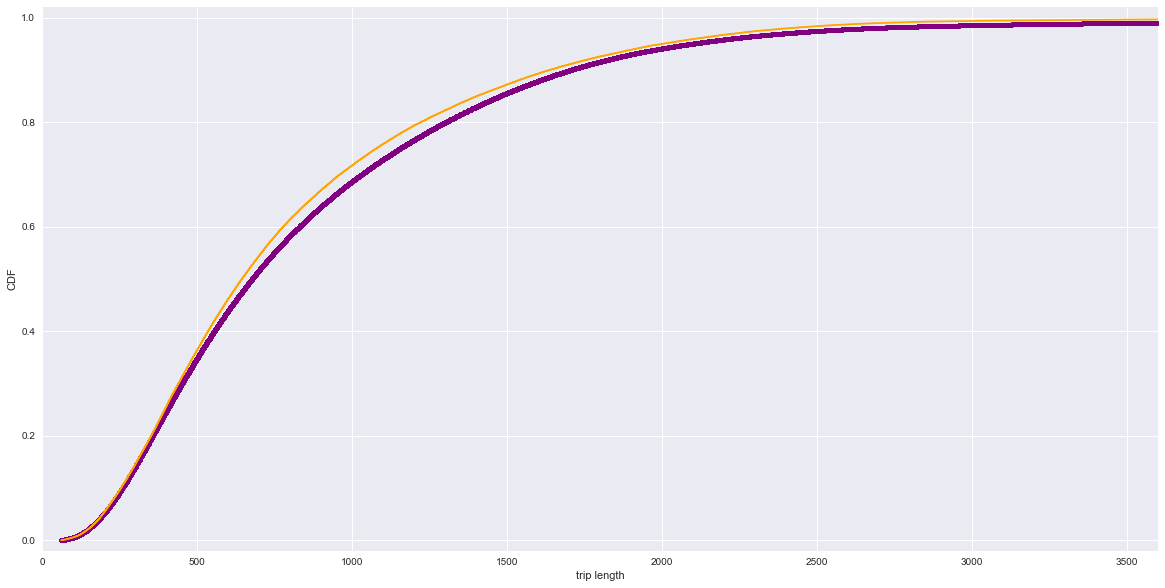

In [41]:
sns.set()
_ = plt.figure(figsize=(20,10))
_ = plt.plot(x, y, marker='.', linestyle='none', color='purple')
_ = plt.plot(x_oa, y_oa, color='orange')
_ = plt.margins(0.02)
_ = plt.xlim(0,60*60)
_ = plt.xlabel('trip length')
_ = plt.ylabel('CDF')
plt.show()

According to the ECDF for trip duration, when the CDF is 50% it happens around 6,000 (which is about 10 minutes). But this is grabbing the older adults (i.e. baby boomers) to see them as slightly above the average.  This is what we are now doing to find and reflect more on, whether the null hypothesis shows that all group subscribers converge around 10 minutes as the median travel time and whether this is also inspiring for older members.  Now we'll look at the ECDF by age group, with attention to the most popular ones.  

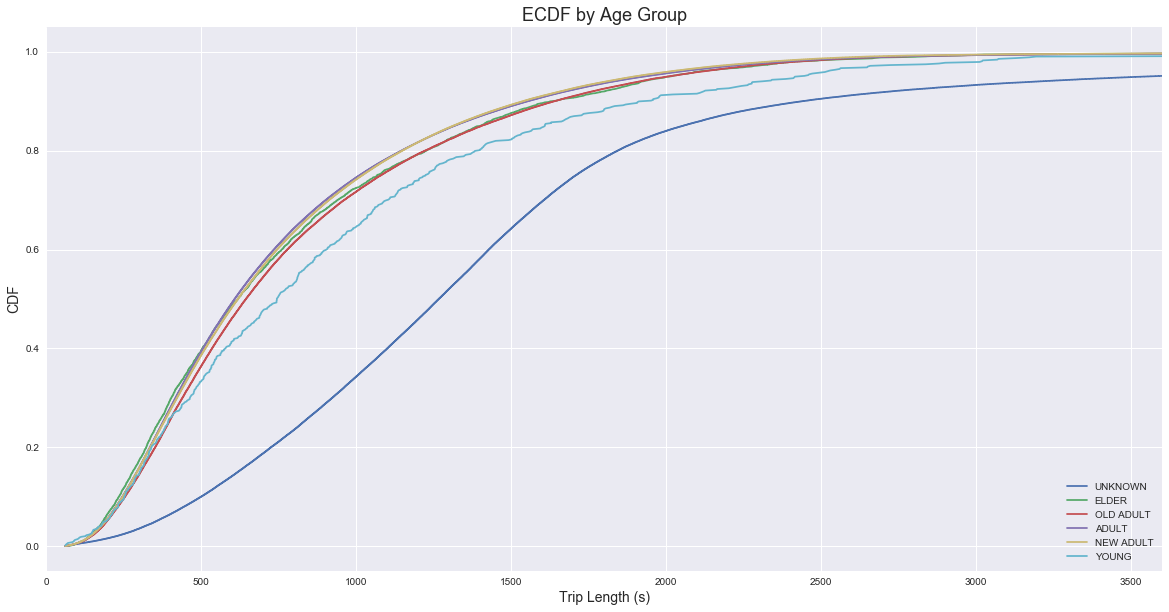

In [42]:
_ = plt.figure(figsize=(20,10))

for name in groups:
    x_t, y_t = ecdf(sample[sample.agegroup == name].tripduration)
    plt.plot(x_t, y_t, label=name)

_ = plt.title('ECDF by Age Group', fontsize=18)
_ = plt.xlim(0,60*60)
_ = plt.xlabel('Trip Length (s)', fontsize=14)
_ = plt.ylabel('CDF', fontsize=14)
_ = plt.legend(loc="lower right", labels=groups)

plt.show()

### Hypothesis Test

The hypothesis test would be to test the older generation versus the middle and the younger generation.  This focuses on the median value and the idea that:

$H_0: G(x) = F(x)$

$H_a: G(x) \neq F(x)$

Here, G(x) is the CDF for all the tripduration while F(x) represents the CDF for older adults.  We'll perform the following:

* K-S test, to see the connection between the old adults and the general sample.
* Bootstrap replication, that provides a 95% confidence interval
* Two-sample hypothesis test, using the difference of medians (since means would differ tremendously)

However, another potential hypothesis is whether if the unknown customers are using the bikes more as to whether they should also have the same time lapse as the subscribers.  Right now, let's focus on the older generation.  We'll explore the customer's bike time later or rather take up a possibility.

In [43]:
from scipy import stats

In [72]:
# Returns the D-statistic between all samples and old adult samples
# p-value is 0, 'ideally' statistically significant
stats.kstest(sample.tripduration, 'norm'), stats.kstest(samoa, 'norm')

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

In [45]:
stats.ks_2samp(sample.tripduration, samoa)

Ks_2sampResult(statistic=0.031713099058500061, pvalue=1.1406145067480021e-81)

Not much info is provided.  Comparing betweeen the two CDFs provided a D-statistic of 0.0317 and a p-value of 1.14e-81, meaning that it is statistically significant.  Here, the null hypothesis can't be rejected as a possible similarity between all and the older generations.  If this is the case, then we may explore more and see whether replicating the same data would provide the same effects.

*NOTE TO NIK: Don't know if I am doing this right?*

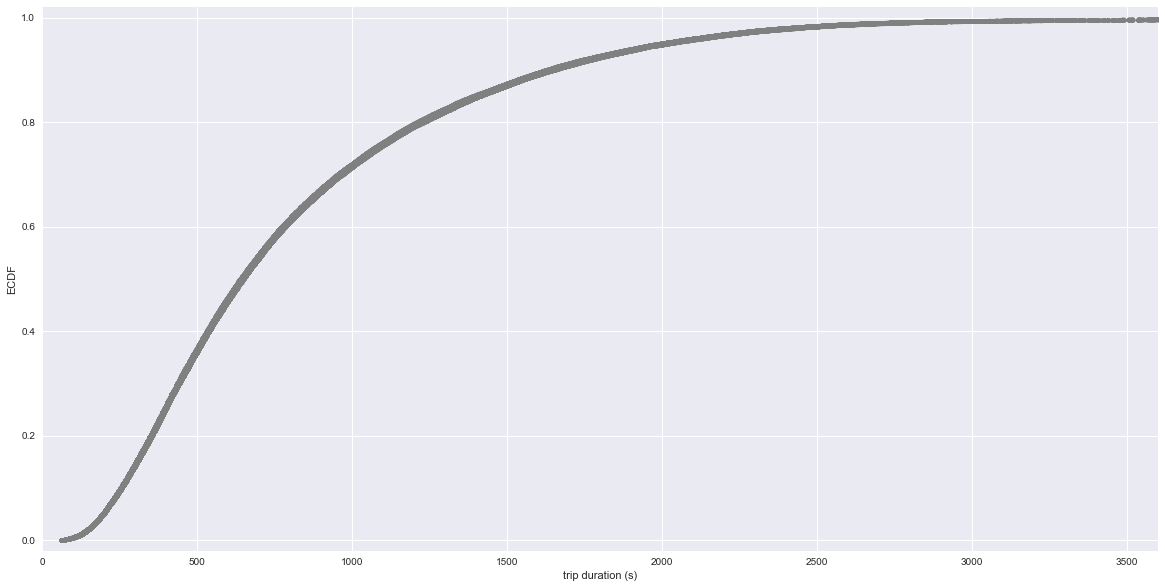

In [46]:
# Let's bootstrap
plt.figure(figsize=(20,10))
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(samoa, size=len(samoa))

    # Compute and plot ECDF from bootstrap sample
    xbs, ybs = ecdf(bs_sample)
    _ = plt.plot(xbs, ybs, marker='.', linestyle='none', color='gray', alpha=0.1)
    # Compute and plot ECDF from original data

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlim(0,3600)
_ = plt.xlabel('trip duration (s)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

The graph above shows 50 bootstrap replicates for the all probable trips.    

Standard error of mean:  34.6894872317
Standard deviation of bootstrap replicates:  34.686998484


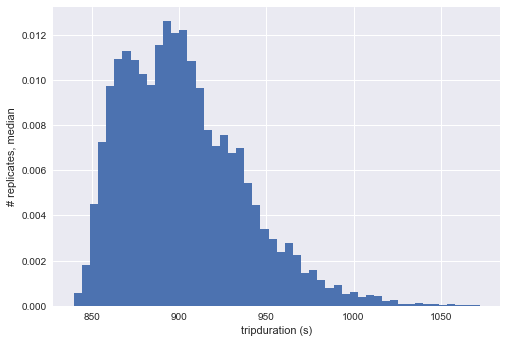

In [54]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(samoa, np.mean, size=10000)

# Compute and print SEM
sem = np.std(samoa) / np.sqrt(len(samoa))
print('Standard error of mean: ', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Standard deviation of bootstrap replicates: ', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('tripduration (s)')
_ = plt.ylabel('# replicates, median')

# Show the plot
plt.show()

In [58]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'seconds for older adults to ride.')

95% confidence interval = [ 964.61728163  996.48004539] seconds for older adults to ride.


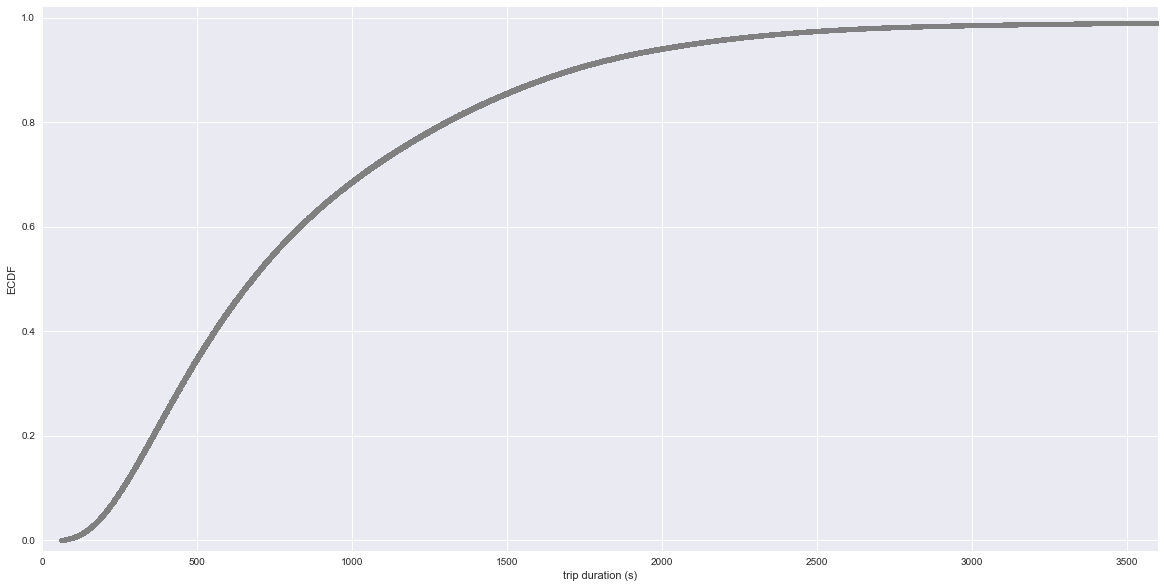

In [59]:
# Bootstrap from original sample
plt.figure(figsize=(20,10))
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(sample.tripduration, size=len(sample.tripduration))

    # Compute and plot ECDF from bootstrap sample
    xbs, ybs = ecdf(bs_sample)
    _ = plt.plot(xbs, ybs, marker='.', linestyle='none', color='gray', alpha=0.1)
    # Compute and plot ECDF from original data

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlim(0,3600)
_ = plt.xlabel('trip duration (s)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Standard error of mean:  8.02477744762
Standard deviation of bootstrap replicates:  8.05218553209


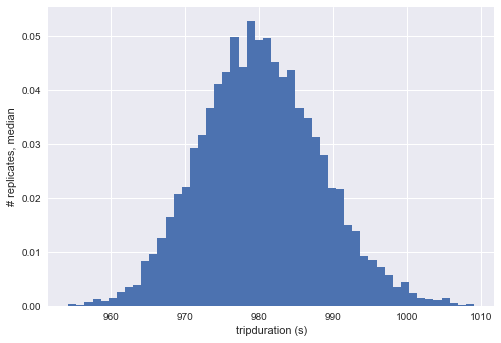

In [60]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(sample.tripduration, np.mean, size=10000)

# Compute and print SEM
sem = np.std(sample.tripduration) / np.sqrt(len(sample.tripduration))
print('Standard error of mean: ', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Standard deviation of bootstrap replicates: ', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('tripduration (s)')
_ = plt.ylabel('# replicates, median')

# Show the plot
plt.show()

In [63]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'seconds for all riders.')

95% confidence interval = [ 965.1321648   996.80116972] seconds for all riders.


What's interesting is that while the distribution of the mean length represented a normal distribution for all riders, the mean length for older riders was skewed right. To put this in perspective, the peak is at 980 seconds mean for all riders, the peak is around 910 seconds mean for older adults.  This is encouraging as to provide to the strategy department to support their claim on focusing more on getting more older adults to use Citibike, in that they have the shortest trips.  Is it practically significant?  But let's move towards hypothesis testing!

In [75]:
# Bootstrap Null Hypothesis Significance Testing (NHST): 
diff_of_mean = diff_of_means(sample.tripduration, samoa)

# Concatenate forces: forces_concat
trips_concat = np.concatenate((sample.tripduration, samoa))

In [76]:
# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(trips_concat, size=len(trips_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(sample.tripduration)],
                                     bs_sample[len(sample.tripduration):])

In [92]:
# Compute and print p-value: p
# Replication saw both similar but observed showed trip length in older adults longer than average
p = np.sum(np.abs(bs_replicates) <= diff_of_mean) / len(bs_replicates)
print('p-value =', p)

p-value = 0.9788


Working with concatenating the older adults back with the original samples, creating 10,000 replications of different samples, providing permutations, the p-value came up as 0.9998.  This is close to one, and in turn, we cannot reject the null hypothesis.  This validates what everything before showed it.  This will still need further investigation across different times and whether the data for the summer would be consistent.  One data would be to see how August 2017 (available) would do against this data set and whether this has showed an increase in older adults using CitiBike during the summer or not.  Below are the three methods:

* K-S Test
* Boostrap confidence intervals
* Bootstrap hypothesis testing

And they all point towards NOT REJECTING THE NULL HYPOTHESIS!

In [85]:
diff_of_mean

77.56425058625871

In [94]:
np.mean(sample.tripduration), np.mean(samoa), np.abs(bs_replicates[1:100])

(980.2857408823346,
 902.7214902960759,
 array([  2.43300958e+01,   1.12702149e+01,   7.67315631e+01,
          7.94468240e+01,   2.42891845e+01,   5.89580835e+01,
          2.03267158e+01,   3.73919695e+01,   3.09030750e+01,
          2.10325300e+01,   4.25805667e+01,   8.78111577e+00,
          2.40813274e+01,   1.72897901e+01,   5.20981514e+01,
          5.41892442e+01,   6.20163920e+00,   2.74847801e+01,
          5.10259417e+00,   2.67080781e+00,   2.23211664e+01,
          5.03974441e+01,   1.10602290e+01,   3.07503508e+01,
          1.65321749e+01,   5.90311386e+01,   5.15277712e+01,
          2.00509056e+01,   3.34644268e-01,   1.07639323e+01,
          7.27372184e+01,   2.51607003e+01,   2.88939444e+01,
          1.14920880e+02,   2.90503001e+01,   1.47118838e+01,
          1.76185713e+01,   2.59773457e+01,   2.57278677e+01,
          2.16719913e+01,   2.83572558e+01,   2.81196120e+01,
          1.34260703e+01,   7.84348400e+00,   1.47924057e+01,
          5.23411073e+01,   3.

## Conclusions

#### Final Observations


#### Recommendations

